In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta, norm, binom
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Math

#Anscombe threshold

Anscombe provides a formula to determine the stopping point of an experiment. The experiment should be terminated when the following condition is true.

Where y is the difference between results of A and B, k is the expected number of future users who will be exposed to a result, and n is the number of users who are exposed to the test so far. And  Phi-inverse is the quantile function of the standard normal.

$$|c_a - c_b| > -\Phi^{-1} \left( \frac{n}{k+2n} \right) \sqrt(n)$$

[ 0  1  0  0  1  0  0  1  0  0  0  1  4  1  2  1  2  1  0  0  1  2  2  1  3
  2  0  3  3  3  2  0  0  1  0  3  0  3  0  5  3  3  3  5  2  1  4  3  3  1
  1  2  4  1  5  1  2  3  5  4  6  1  2  3  3  3  3  3  5  2  4  0  3  6  4
  2  7  6  3  1  5  1  7  2  2  3  7  6  4  4  5  3  5  4  5  5  4  3 10  6
  2  6  4  2  8  9  6  9  5  7  5  6  5  4  7  6  4  7  4  7  7  6  5  9 11
  9  8  6  4  8  3  7  8  4  5 10 10 13  7  4  6  4  4  7  4  7  5  8 10 10
  6 10  7  9  5  2  8  7  5  9  4  6  7  8  9 12  9 14 11  4  4  4  5  9  5
 17  8  8  8  9 10  8  8  7  4  8 10 13  9  7  7  9 11 13 10 11 10 14 10 11
  8  8  9 11  9  7 12  7 17 11  6 11 15  9 10 11  9 17 12 16 10  7 14  8 13
 11  7  8 11  9 16 10  7 12 12  6 18 11 18 14 10  9 12 10 12  6 15  8 15 24
 12 18  6 12 12 10 10 12  9 13  8 17 18 14 12 15 15 15 15 17 15 15 18 19 13
 15 13 13 14 11 16 11 10 16 18 18 10 14 18 16 13 16 12 13 12 13 19 19 17 18
 12 16 13 13 18 16 18 19 18 13 13 20 10 24 18 26 16 14 15 26 15 12 15 14 18
 19 12 17 24

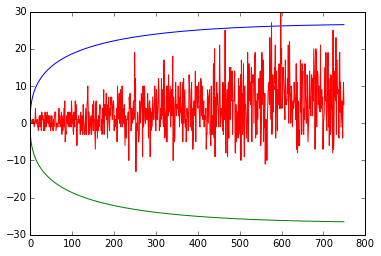

In [7]:
fig, ax = plt.subplots(1, 1)
fig.figsize=(45, 45)


Views_per_Minute = 150
Duration = 5
Future = 20

A_ctr = 0.05
B_ctr = 0.049

n = np.arange(Duration * Views_per_Minute)
n = n + 1
#print n
k = Future * Views_per_Minute
Ansc = -norm.ppf(n/(k+(2.0*n))) * np.sqrt(n)
#print Ansc

A_clicks = binom.rvs(n, 0.051)
#print A_ctr * n
print A_clicks
B_clicks = binom.rvs(n, 0.041)
#B_ctr * n
#print B_clicks
#print np.abs(A_clicks-B_clicks)

x = np.arange(Views_per_Minute * Duration)
ax.plot(x, Ansc)
ax.hold(True)
ax.plot(x, -Ansc)
ax.hold(True)
ax.plot(x, A_clicks-B_clicks)

###No idea how the code below is meant to work!!

In [55]:
duration = 20
views_per_minute = 1000

def plot_anscombe(duration, views_per_minute, serving, k_const, color):
    n = np.arange(duration*views_per_minute)
    
    if k_const:
        k = ((serving)*views_per_minute)
    else:
        k = ((duration+serving)*views_per_minute) - n
    
    anscombe = -norm.ppf((n / (k + 2.0*n))) * np.sqrt(n)
    
    pd.DataFrame(data={'upper':anscombe,'lower':-anscombe}).plot(legend=None, ax=plt.gca(), color=color)
    
    return plt.gca().get_legend_handles_labels()[0][-1]

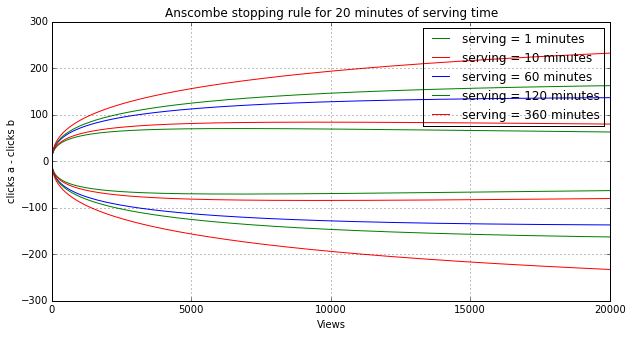

In [57]:
fig = plt.figure(figsize=(10,5))
h = []
l = []
servings = [1, 10, 60, 120, 360]
k_consts = [False]*3+[True]*3
colors = 'grb'*2

for s, k, color in zip(servings, k_consts, colors):
    h.append(plot_anscombe(20, 1000, s, k, color))
    l.append("serving = %d %s" % (s, "minutes"))
    fig.hold(True)
    
plt.legend(h, l)
plt.title('Anscombe stopping rule for 20 minutes of serving time')
plt.xlabel('Views')
plt.ylabel('clicks a - clicks b');

[1, 2, 4, 8, 16, 32]
[False, False, False, True, True, True]
['red', 'black', 'green', 'blue', 'yellow', 'magenta']
color is  red
n is  [    0     1     2 ..., 19997 19998 19999]
k is  [21000 20999 20998 ...,  1003  1002  1001]
anscombe is  [        nan  3.90242549  5.27692269 ...,  4.33669908  4.33237661
  4.32805414]
color is  black
n is  [    0     1     2 ..., 19997 19998 19999]
k is  [22000 21999 21998 ...,  2003  2002  2001]
anscombe is  [        nan  3.91366705  5.29346891 ...,  8.45792674  8.45370892
  8.44949108]
color is  green
n is  [    0     1     2 ..., 19997 19998 19999]
k is  [24000 23999 23998 ...,  4003  4002  4001]
anscombe is  [         nan   3.93461587   5.32429411 ...,  16.16029777  16.15627826
  16.15225873]
color is  blue
n is  [    0     1     2 ..., 19997 19998 19999]
k is  8000
anscombe is  [         nan   3.66232395   4.92272227 ...,  29.76061237  29.76009786
  29.75958337]
color is  yellow
n is  [    0     1     2 ..., 19997 19998 19999]
k is  16000
anscomb

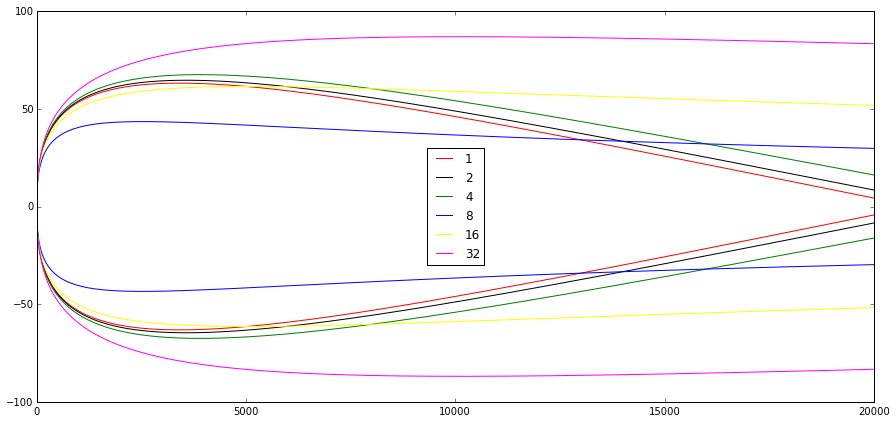

In [62]:
servings = [1, 2, 4, 8, 16, 32]
print servings
k_consts = [False]*3 + [True]*3
print k_consts
colors = ['red', 'black', 'green', 'blue', 'yellow', 'magenta']
print colors


fig = plt.figure(figsize = (15, 7))
ax = plt.subplot(111)

for s, kcon, color in zip(servings, k_consts, colors):
    #print s, kcon, color
    duration = 20
    views_per_minute = 1000
    
    n = np.arange(duration * views_per_minute)
    #print n
    
    if kcon:
        k = s * views_per_minute
        #print "here 1 k is", k
    else:
        k = ((duration + s) * views_per_minute) - n
        #print "here 2 k is", k
        
    print "color is ", color
    print "n is ", n
    print "k is ", k
    anscombe = -norm.ppf((n / (k + 2.0*n))) * np.sqrt(n)
    print "anscombe is ", anscombe
    ax.plot(anscombe, label=s,  color = color)
    ax.plot(-anscombe, color = color)
    ax.legend(loc = 'best')

4.30000001222
[        nan  0.99996875  0.99999997 ...,  1.          1.          1.        ]


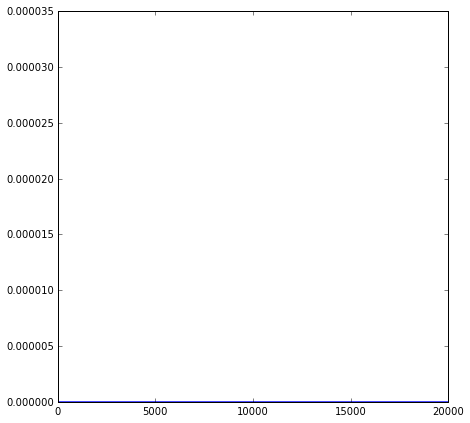

In [70]:
print norm.ppf(0.999991460095)
print norm.cdf(anscombe)
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.plot(norm.cdf(-anscombe))